In [102]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
def get_df(dataset,cols=None):
    ds_path = 'G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets'
    df = pd.read_csv(os.path.join(ds_path,dataset),usecols=cols)
    return df

In [104]:
df = get_df('diabetes_dataset.csv')

In [105]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [106]:
df = df.drop(['gender','smoking_history'],axis=1)

In [107]:
df.columns = ['age', 'hypertension', 'heart_disease',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'Class']

In [108]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Class
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [109]:
df.shape

(100000, 7)

In [110]:
df.isnull().sum()

age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
Class                  0
dtype: int64

In [111]:
df['Class'].value_counts()

Class
0    91500
1     8500
Name: count, dtype: int64

## Using ensemble methods

### Random forest classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [113]:
X = df.drop('Class',axis=1)
y = df['Class']

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

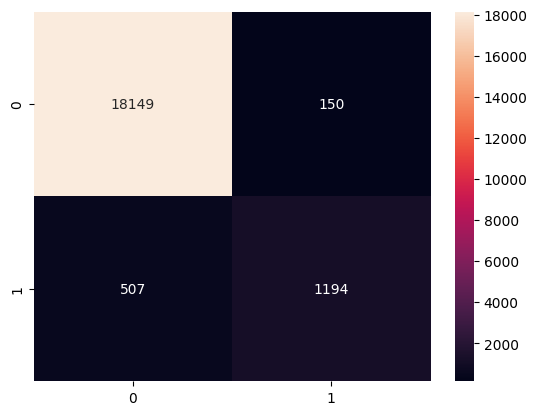

In [117]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18299
           1       0.89      0.70      0.78      1701

    accuracy                           0.97     20000
   macro avg       0.93      0.85      0.88     20000
weighted avg       0.97      0.97      0.97     20000



In [119]:
# give weight 1 to class 0 and give weight 100 to class 1
class_weights = dict({
    0: 1,
    1: 100
})

## Under sampling
**Under sampling majority class**

### Using pandas etc

In [120]:
df_minority_class = df[df['Class']==1] 
df_majority_class = df[df['Class']==0]

In [121]:
df_under_sampled = df_majority_class.sample(df_minority_class.shape[0])

In [122]:
combined_df = pd.concat([df_minority_class,df_under_sampled])

In [123]:
combined_df.shape

(17000, 7)

In [124]:
X = combined_df.drop('Class',axis=1)
y = combined_df['Class']

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

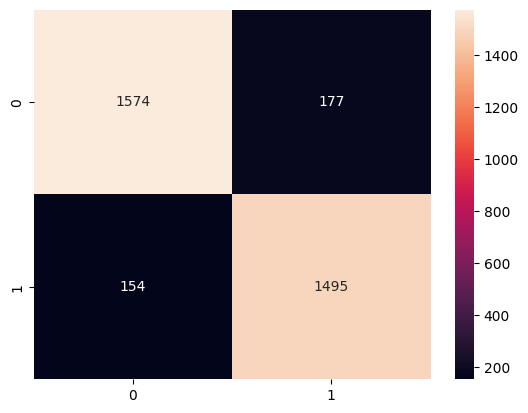

In [126]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1751
           1       0.89      0.91      0.90      1649

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



### Using imblearn 

In [80]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [128]:
X = df.drop('Class',axis=1)
y = df['Class']

In [129]:
# minority class will be 80% of majority class
# 506*0.8 (majority) = 405 (minority)
ns = NearMiss(sampling_strategy=0.8)
X_train_ns,y_train_ns = ns.fit_resample(X,y)

In [130]:
Counter(y_train_ns)

Counter({0: 10625, 1: 8500})

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X_train_ns,y_train_ns,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

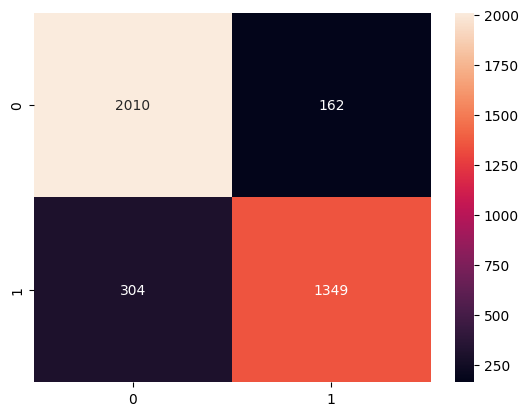

In [132]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2172
           1       0.89      0.82      0.85      1653

    accuracy                           0.88      3825
   macro avg       0.88      0.87      0.87      3825
weighted avg       0.88      0.88      0.88      3825



## Over Sampling
**Oversampling minority class**

### Random over sampler

In [134]:
from imblearn.over_sampling import RandomOverSampler

In [135]:
X = df.drop('Class',axis=1)
y = df['Class']

In [141]:
ros = RandomOverSampler(sampling_strategy=0.9)
X,y = ros.fit_resample(X,y)

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [143]:
Counter(y)

Counter({0: 91500, 1: 82350})

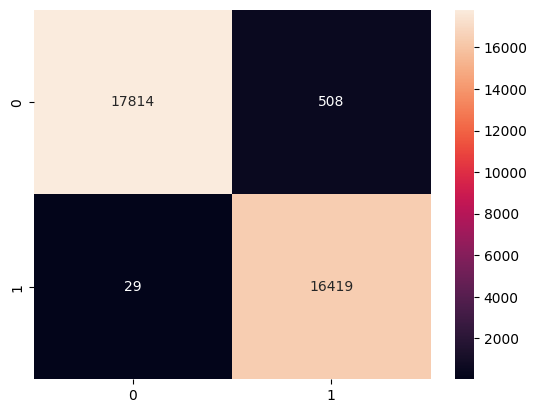

In [144]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     18322
           1       0.97      1.00      0.98     16448

    accuracy                           0.98     34770
   macro avg       0.98      0.99      0.98     34770
weighted avg       0.98      0.98      0.98     34770



### SMOTE

In [146]:
from imblearn.over_sampling import SMOTE

In [147]:
X = df.drop('Class',axis=1)
y = df['Class']

In [148]:
smote = SMOTE(sampling_strategy=0.9)
X,y = smote.fit_resample(X,y)

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [150]:
Counter(y)

Counter({0: 91500, 1: 82350})

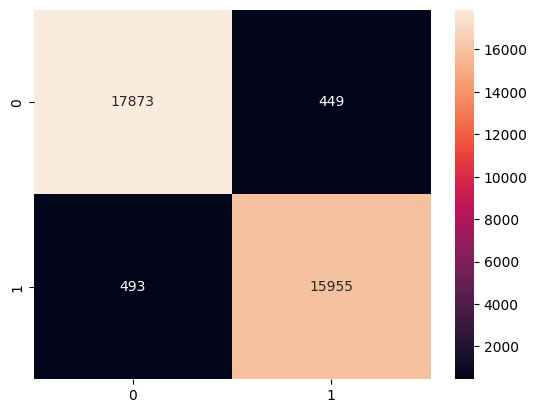

In [151]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18322
           1       0.97      0.97      0.97     16448

    accuracy                           0.97     34770
   macro avg       0.97      0.97      0.97     34770
weighted avg       0.97      0.97      0.97     34770



### SMOTETomek

In [155]:
from imblearn.combine import SMOTETomek

In [156]:
X = df.drop('Class',axis=1)
y = df['Class']

In [169]:
smotetomek = SMOTETomek(sampling_strategy=0.95)
X,y = smotetomek.fit_resample(X,y)

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [171]:
Counter(y)

Counter({0: 90219, 1: 85706})

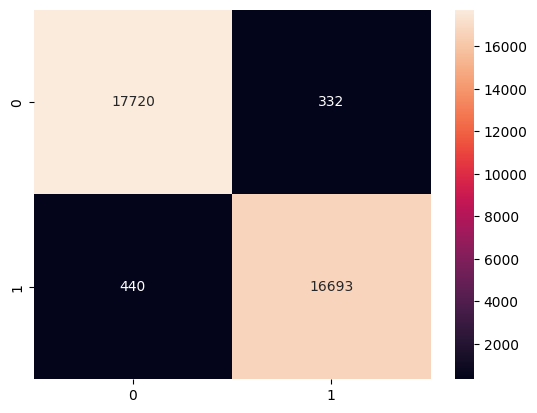

In [172]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18052
           1       0.98      0.97      0.98     17133

    accuracy                           0.98     35185
   macro avg       0.98      0.98      0.98     35185
weighted avg       0.98      0.98      0.98     35185



### Easy ensemble classifier

In [175]:
from imblearn.ensemble import EasyEnsembleClassifier

In [176]:
X = df.drop('Class',axis=1)
y = df['Class']

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rf_clf = EasyEnsembleClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [178]:
Counter(y)

Counter({0: 91500, 1: 8500})

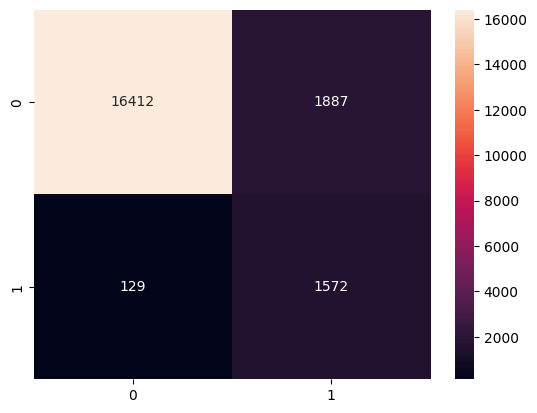

In [179]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     18299
           1       0.45      0.92      0.61      1701

    accuracy                           0.90     20000
   macro avg       0.72      0.91      0.78     20000
weighted avg       0.95      0.90      0.91     20000

